### ***Theory of Gaussian Naive Bayes***

Applying Naive Bayes on a dataset means estimating $f: X \rightarrow Y$ or equivalently $P\{Y|X\}$ where $Y$ is a boolean random variable and $X$ is a vector containg the attributes. By applying Bayes rule, we see that we can express $P\{Y=y_i|X=x_i\}$ as the following:
$$P\{Y=y_i|X=x_k\}=\frac{P\{X=x_k|Y=y_i\}\cdot P\{Y=y_i\}}{\sum_jP\{X=x_k|Y=y_j\}\cdot P\{Y=y_j\}}$$
where $y_i$ denotes the $i\text{-th}$ possible value of $Y$ and $x_k$ denotes the $k\text{-th}$ possible vector value for $X$. One way to learn $P\{Y|X\}$ is to use the training data to estimate $P\{X|Y\}$ and $P\{Y\}$: we can then employ them, togheter with Bayes rule above, to determine $P\{Y|X=x_k\}$ for any new instance $x_k$. A classifier like this will output the probability distribution over all possible values of $Y$ for each new instance $X$ that we ask it to classify. As in DT and RF, there is no need to be perform standardization: it's internally done by the method.

Using a Bayes classifier to accurately estimate $P\{X|Y\}$ typically requires a lot of training examples. To overcome this problem, Naive Bayes classifiers assumes that each $X_i$ is conditionally independent of each of the others $X_k$ given the label $Y$ and also independent of each subset of the others $X_k$ given $Y$. Given three sets of random variable $X$, $Y$ and $Z$, we say that $X$ is conditionally independent of $Y$ given $Z$, if and only if the probability ditribution governing $X$ is independent of the value of $Y$ given $Z$; that is:
$$P\{X=x_i|Y=y_j, Z=z_k\}=P\{X=x_i|Z=z_k\} \,\,\,\,\, \forall i, j, k$$

With this hypothesis, we can write $P\{X|Y\}$ like:
$$P\{X|Y\}=P\{X_1, X_2, \dots, X_n|Y\}=\frac{P\{X_1, \dots,X_n\}}{P\{Y\}}=\frac{P\{X_1, \dots, X_n, Y\}}{P\{X_2, \dots, Y\}}\cdot \frac{P\{X_2, \dots, X_n, Y\}}{P\{Y\}}=
\\
P\{X_1|X_2,\dots,Y\}\cdot P\{X_2, \dots X_n|Y\}=P\{X_1|Y\}\cdot P\{X_2|Y\}\cdots P\{X_n|Y\}=\prod_{i=1}^n P\{X_i|Y\}$$

where we have applied $n$ times the definition of conditional independence and a general property of probabilities.

---

Naive Bayes algorithm works the same for attributes $X$ being either discrete or real-valued. The expression for the probability that $Y$ will take on its $k\text{-th}$ possible value (i.e. the posterior probability) is:
$$P\{Y=y_k|X_1,\dots,X_n\}=\frac{P\{X_1, \dots,X_n|Y=y_k\}\cdot P\{Y=y_k\}}{\sum_jP\{X_1,\dots,X_n|Y=y_j\}\cdot P\{Y=y_j\}}$$

where the sum is taken over all possible values $y_j$ os $Y$. By what have been previously said about conditional independence, we can rewrite the expression as:
$$P\{Y=y_k|X_1,\dots,X_n\}=\frac{P\{Y=y_k\}\cdot \prod_i P\{X_i|Y=y_k\}}{\sum_j P\{Y=y_j\}\cdot \prod_i P\{X_i|Y=y_i\}}$$

that is the foundamental equation for the Naive Bayes classifier; $P\{Y\}$ (the prior) and $P\{X_i|Y\}$ (the likehood) have been already estimated. 

If we are interested in only the most probable value of $Y$, then we have the Naive Bayes classification rule:
$$Y= \argmax_{y_k}\frac{P\{Y=y_k\}\cdot \prod_i P\{X_i|Y=y_k\}}{\sum_j P\{Y=y_j\}\cdot \prod_i P\{X_i|Y=y_i\}}$$

Noticing that the denominator doesn't depend on $y_k$, we can get rid of it and write:
$$Y= \argmax_{y_k}\,\,P\{Y=y_k\}\cdot \prod_i P\{X_i|Y=y_k\}$$

---

All of the features in our samples $X$ are continuous, so we need a way to represent the distributions of $P\{X_i|Y\}$. One common approach is to assume that for each possible discrete value $y_k$ of $Y$, the distribution of each continuous $X_i$ is Gaussian defined by mean and standard deviation specific to $X_i$ and $y_k$.  Such parameters can be estimated using conditional expected value:
$$\mu_{i,k}=\mathbb{E}[X_i|Y=y_k]\,\,\,\,\,\,\,\, \sigma_{i,k}^2=\mathbb{E}[(X_i-\mu_{i,k})^2|Y=y_k]$$

for each feature $X_i$ and possible label $y_k$ of $Y$. This means that there are $2|Y|n$ of this parameters and each of them has to be estimated independently. Among many estimators, the ones used in this notebook are the following:
1. MLE (Maximum Likehood Estimator) for the mean:
$$\hat \mu_{i,k}=\frac{1}{\sum_j \mathbb{I}\{Y_j=y_k\}}\cdot\sum_j X_{i, j}\cdot\mathbb{I}\{Y_j=y_k\}$$

that is nothing more than the mean of $X_{i, j}$.

2. MLE for the variance:
$$\hat \sigma_{i, k}^2=\frac{1}{\sum_j \mathbb{I}\{Y_j=y_k\}}\cdot\sum_j (X_{i, j}-\hat \mu_{i, k})^2\cdot\mathbb{I}\{Y_j=y_k\}$$

that is biased.

3. MVUE (Minimum Variance Unbiased Estimator):
$$\hat \sigma_{i, k}^2=\frac{1}{\left(\sum_j \mathbb{I}\{Y_j=y_k\}\right) - 1}\cdot\sum_j (X_{i, j}-\hat \mu_{i, k})^2\cdot\mathbb{I}\{Y_j=y_k\}$$

where $Y_j$ means the label and $X_{i, j}$ means the value of $i\text{-th}$ feature of $j\text{-th}$ traing sample.

Also, priors $\pi_k=P\{Y=y_k\}$ have to be estimated:
$$\hat \pi_k=\frac{\sum_j \mathbb{I}\{Y_j=y_k\}}{n}$$

### ***Model definition***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [424]:
class GaussianNaiveBayes:
    def __init__(self, classes):
        """
            Initializes the Naive Bayes classifer parameters.

            Args:
                classes (list): the classes the data is classified in.
                                Note: this paramter can be removed and its usages eplaced with [0, 1], but since
                                NB can be used for multiclass problems, it seems reasoneable to us keeping it. 
        """

        self.classes = classes

        #A dict that will contain the values of the priors indexed by class.
        self.priors = None

        #Each value will be an array of len(features) (the columns of X passed to self.fit())
        #containing the mean and the variance of Gaussian distribution associated to (y_k, X_i) as defined in tthe theory part
        self.means = None
        self.variances = None
    
    def fit(self, X, y): 
        """
            This methods fits NB to the training data.

            Args:
                X (np.ndarray): the matrix containg the training samples (on the rows).
                y (np.ndarray): the vector with the labels.
        """

        #Compute and store the priors (see theory part)
        self.priors = {}

        for c in self.classes:
            self.priors[c] = np.mean(y == c)
        
        #Compute and store mean and variance for each feature per class (see theory part)
        self.means = {}
        self.variances = {}
        
        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = np.mean(X_c, axis = 0)

            #Note: here we could have used the NumPy built-in command for the variance estimation
            #np.var(X_c, axis = 0, ddof = 1) where ddof = 1 means that at the denominator we want a -1
            #to get an unbiased estimator
            self.variances[c] = np.sum((X_c - self.means[c]) ** 2, axis = 0) / (len(X_c) - 1)
    
    def predict(self, X):
        """
            This method makes prediction on new data.

            Args:
                X (np.ndarray): the matrix containg the samples to predict (on the rows).

            Returns:
                predictions (np.ndarray): the array containing the predicted class
        """

        if self.means == None or self.variances == None:
            raise ValueError("NB classifier has not been trained yet.")
        
        #Posterior given by P{Y = y_k | X}, so we represent it in a matrix form where each row corresponds to a sample and 
        #each column corresponds the probability of a class y_k. 
        #Note: in the case of binary classification, we can reduce this matrix to a vector. For the sake of generality, we keep this form. 
        posteriors = np.empty((X.shape[0], len(self.classes)))
        
        for i, c in enumerate(self.classes):
            #Both priors and likehoods can be really small numbers, so we'll work using the log 
            prior = np.log(self.priors[c])

            #For the likhood, we have to compute log(*) = log(density(X, self.means[c], self.variances[c])) where
            #"density" is the Gaussian PDF, so by log(ab) = log(a) * log(b):
            #log(*) = log(1 / np.sqrt(2 * np.pi * self.variances[c] + 1e-8)) * log(np.exp((X - self.means[c]) ** 2 / (2 * self.variances[c] + 1e-8))) =
            #       = -1 / 2 * np.log(2 * np.pi * self.variances[c] + 1e-8) - (X - self.means[c]) ** 2 / (2 * self.variances[c] + 1e-8)
            likelihood = np.sum(-0.5 * np.log(2 * np.pi * self.variances[c] + 1e-8) - (X - self.means[c]) ** 2 / (2 * self.variances[c] + 1e-8), axis = 1)

            #Finally, we store the log of the poterior in the matrix. 
            #Note: we are saving one entire column at the time because we'are working column by column. "prior" is a single number, but "likehood" is a vector
            #corresponding to the density evaluated in the sample
            posteriors[:, i] = prior + likelihood
        
        #To get probabilities, we must first compute the exponential and then normalize
        #In the same way as before, this operation is done column by column (axis = 1)
        #Note: keepdims = True is required becuse otherwise np.sum() would produce a row vector and 
        #the division of a column vector with a row vectors gives a matrix because of brodcasting
        probs = np.exp(posteriors) / np.sum(np.exp(posteriors), axis = 1, keepdims = True)

        #The predicted class is the one with highest probability (see theory)
        return self.classes[np.argmax(probs, axis = 1)]
    
    def plot_gaussian_pdfs(self, feature_names, n_cols = 1):
        """
            Utility method to plot the probability density function asscoaited to each class and features.
            PDFs of same feature will be displayed on the same plot. Plots will be displayed 

            Args:
                feature_name (list): the names to be assigned to the features. This list should have contain only
                                     the features used for training in that order.
                n_cols (tuple): specifies how many plots to be displayed on each row
        """

        n_rows = int(np.ceil(len(feature_names) / n_cols)) 

        fig, axs = plt.subplots(n_rows, n_cols, figsize = (5 * n_cols, 5 * n_rows))
        axs = axs.flatten()

        for i in range(len(feature_names)):
            for k in range(len(self.classes)):
                #This is a definition used only to avoid to repeat in the code a lot of times self.classes[k] given that the dicts are indexed by class
                c = self.classes[k]

                #Use a sufficently large range for the x variable and compute the Gaussian PDF associated to self.means[c] and self.variances[c]
                x = np.linspace(self.means[c][i] - 5 * self.variances[c][i], self.means[c][i] + 5 * self.variances[c][i], 250)
                y = 1.0 / np.sqrt(2 * np.pi * self.variances[c][i]) * np.exp(-((x - self.means[c][i]) ** 2) / (2 * self.variances[c][i]))

                #Finally, plot all PDF for same feature on the same plot
                #Note: there might be classes with PDF with small variance on the same plot as others with higher one!
                axs[i].plot(x, y, "--", label = f"class: {self.classes[k]}")
                axs[i].set_title(f"Feature name: {feature_names[i]}")
                axs[i].set_xlabel("x")
                axs[i].set_ylabel("PDF")
            
            axs[i].legend()

        #Remove empty subplots if any
        for i in range(len(feature_names), n_rows * n_cols):
            fig.delaxes(axs[i])

        plt.tight_layout()
        plt.plot()

### ***Usage of the model***

In [437]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

import sys
sys.path.append("..")

from utils.preprocessing import undersample, fit_resample

import utils.model_evaluation as me
import matplotlib.pyplot as plt
import seaborn as sns

In [426]:
#Load the dataset
init_data = pd.read_csv("../creditcard_2021.csv")
data = init_data[me.feature_vectors["v3"] + ["Class"]]

#"Class" column is the target variable, so we remove it from the feature matrix and store it in the variable y
X = data.drop(columns = ["Class"])
y = data["Class"]

X = np.array(X)
y = np.array(y)

In [427]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

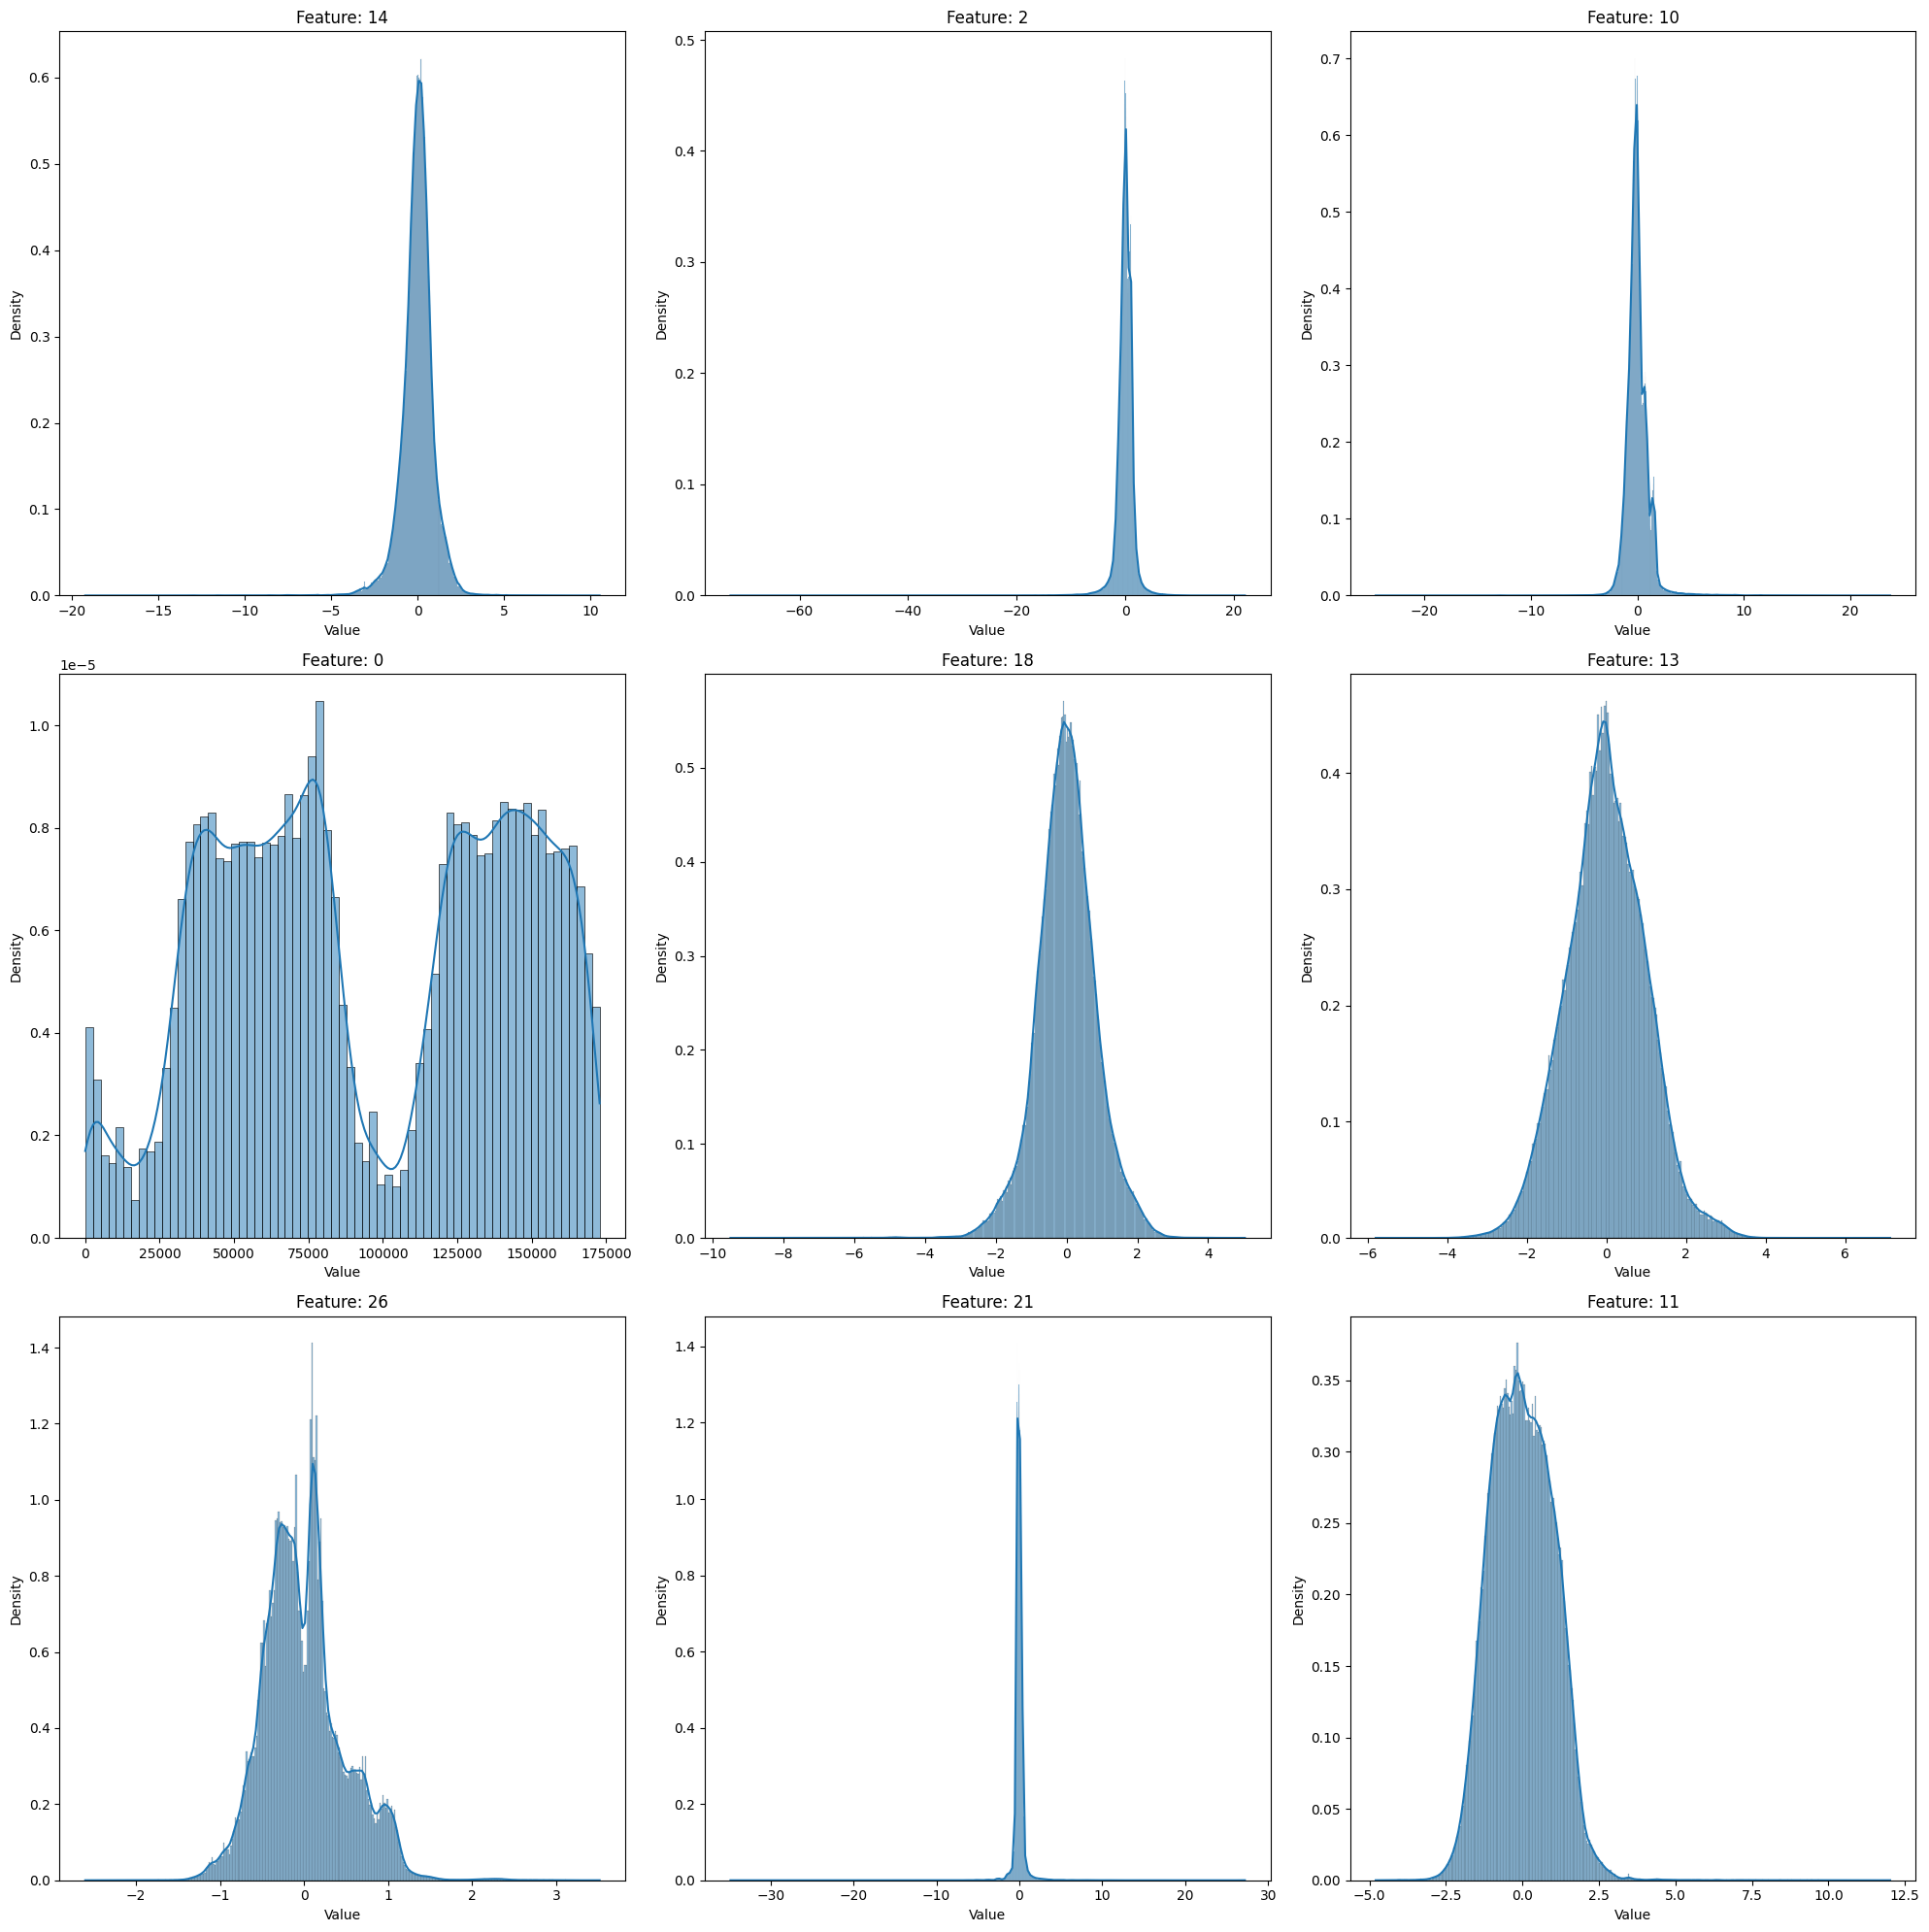

In [451]:
#In this cell, we're going to see how the feature values are distributed. 
#With sns, we'll plot an histogram and interpolate it to see if a Gaussian distribution can be fitted or not.

Z = np.array(init_data)

fig, axs = plt.subplots(3, 3, figsize = (20, 20))
axs = axs.flatten()

features = np.random.choice(range(len(init_data.columns)), size = 9, replace = False)

for i, f in enumerate(features):
    #kde = True means that we want an interpolation and stat = "density" means that the frequencies will be normalized in [0, 1]
    sns.histplot(data = Z[:, f], kde = True, ax = axs[i], stat = 'density')
    axs[i].set_title(f'Feature: {f}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

#As you can notice, there are some columns for which the distribution is not really a Gaussian one, like (V22, V1, ...)
#while for some others it is true. 

In [428]:
#Note: in constrant with what have been done for RF, here we don't apply SMOTE because we have observed experimentally that it decreases bothe the recall and the precision on the testing set
#If you want to give it a try, uncomment the following
#X_smote = fit_resample(X_train[y_train == 1], 2500, 10)

#X_train = np.vstack((X_train, X_smote))
#y_train = np.hstack((y_train, [1] * 2500))

In [429]:
#Another thing that we can try to do is undersampling (we have observed experimentally that it promotes precision with a slight decrease on recall):
X_train, y_train = undersample(X_train, y_train, 0, 1 - (sum(y_train) * 300.0 / X_train.shape[0]))

In [430]:
nb = GaussianNaiveBayes(classes = np.unique(y))

In [431]:
#Once defined, we can train the model
nb.fit(X_train, y_train)

In [432]:
#Once trained, we can make predictions
y_pred = nb.predict(X_test)
y_pred

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_13120\1595361331.py:88: RuntimeWarning: invalid value encountered in divide
  probs = np.exp(posteriors) / np.sum(np.exp(posteriors), axis = 1, keepdims = True)


array([0, 0, 0, ..., 0, 0, 0], shape=(85443,))

Precision: 0.10254163014899212
Recall: 0.7959183673469388
F1 Score: 0.18167701863354038
Accuracy: 0.9876642908137588
AUC Score: 0.8919565575245292


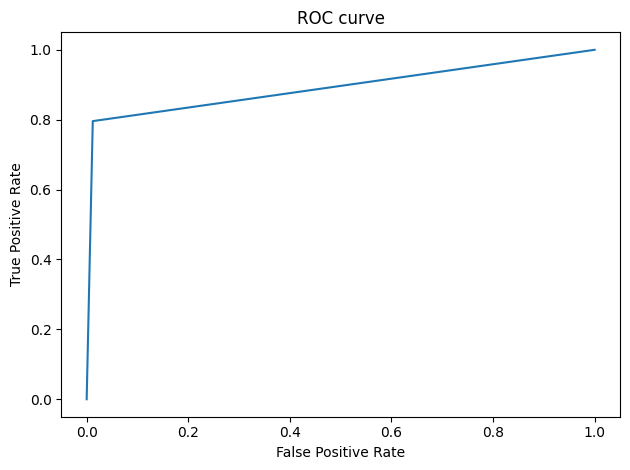

In [433]:
metrics = me.compute_metrics(y_pred, y_test)

print("Precision:", metrics["precision"])
print("Recall:", metrics["recall"])
print("F1 Score:", metrics["f1"])
print("Accuracy:", metrics["accuracy"])

print("AUC Score:", metrics["auc"])

plt.plot(metrics["roc"]["fpr"], metrics["roc"]["tpr"])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.tight_layout()
plt.show()

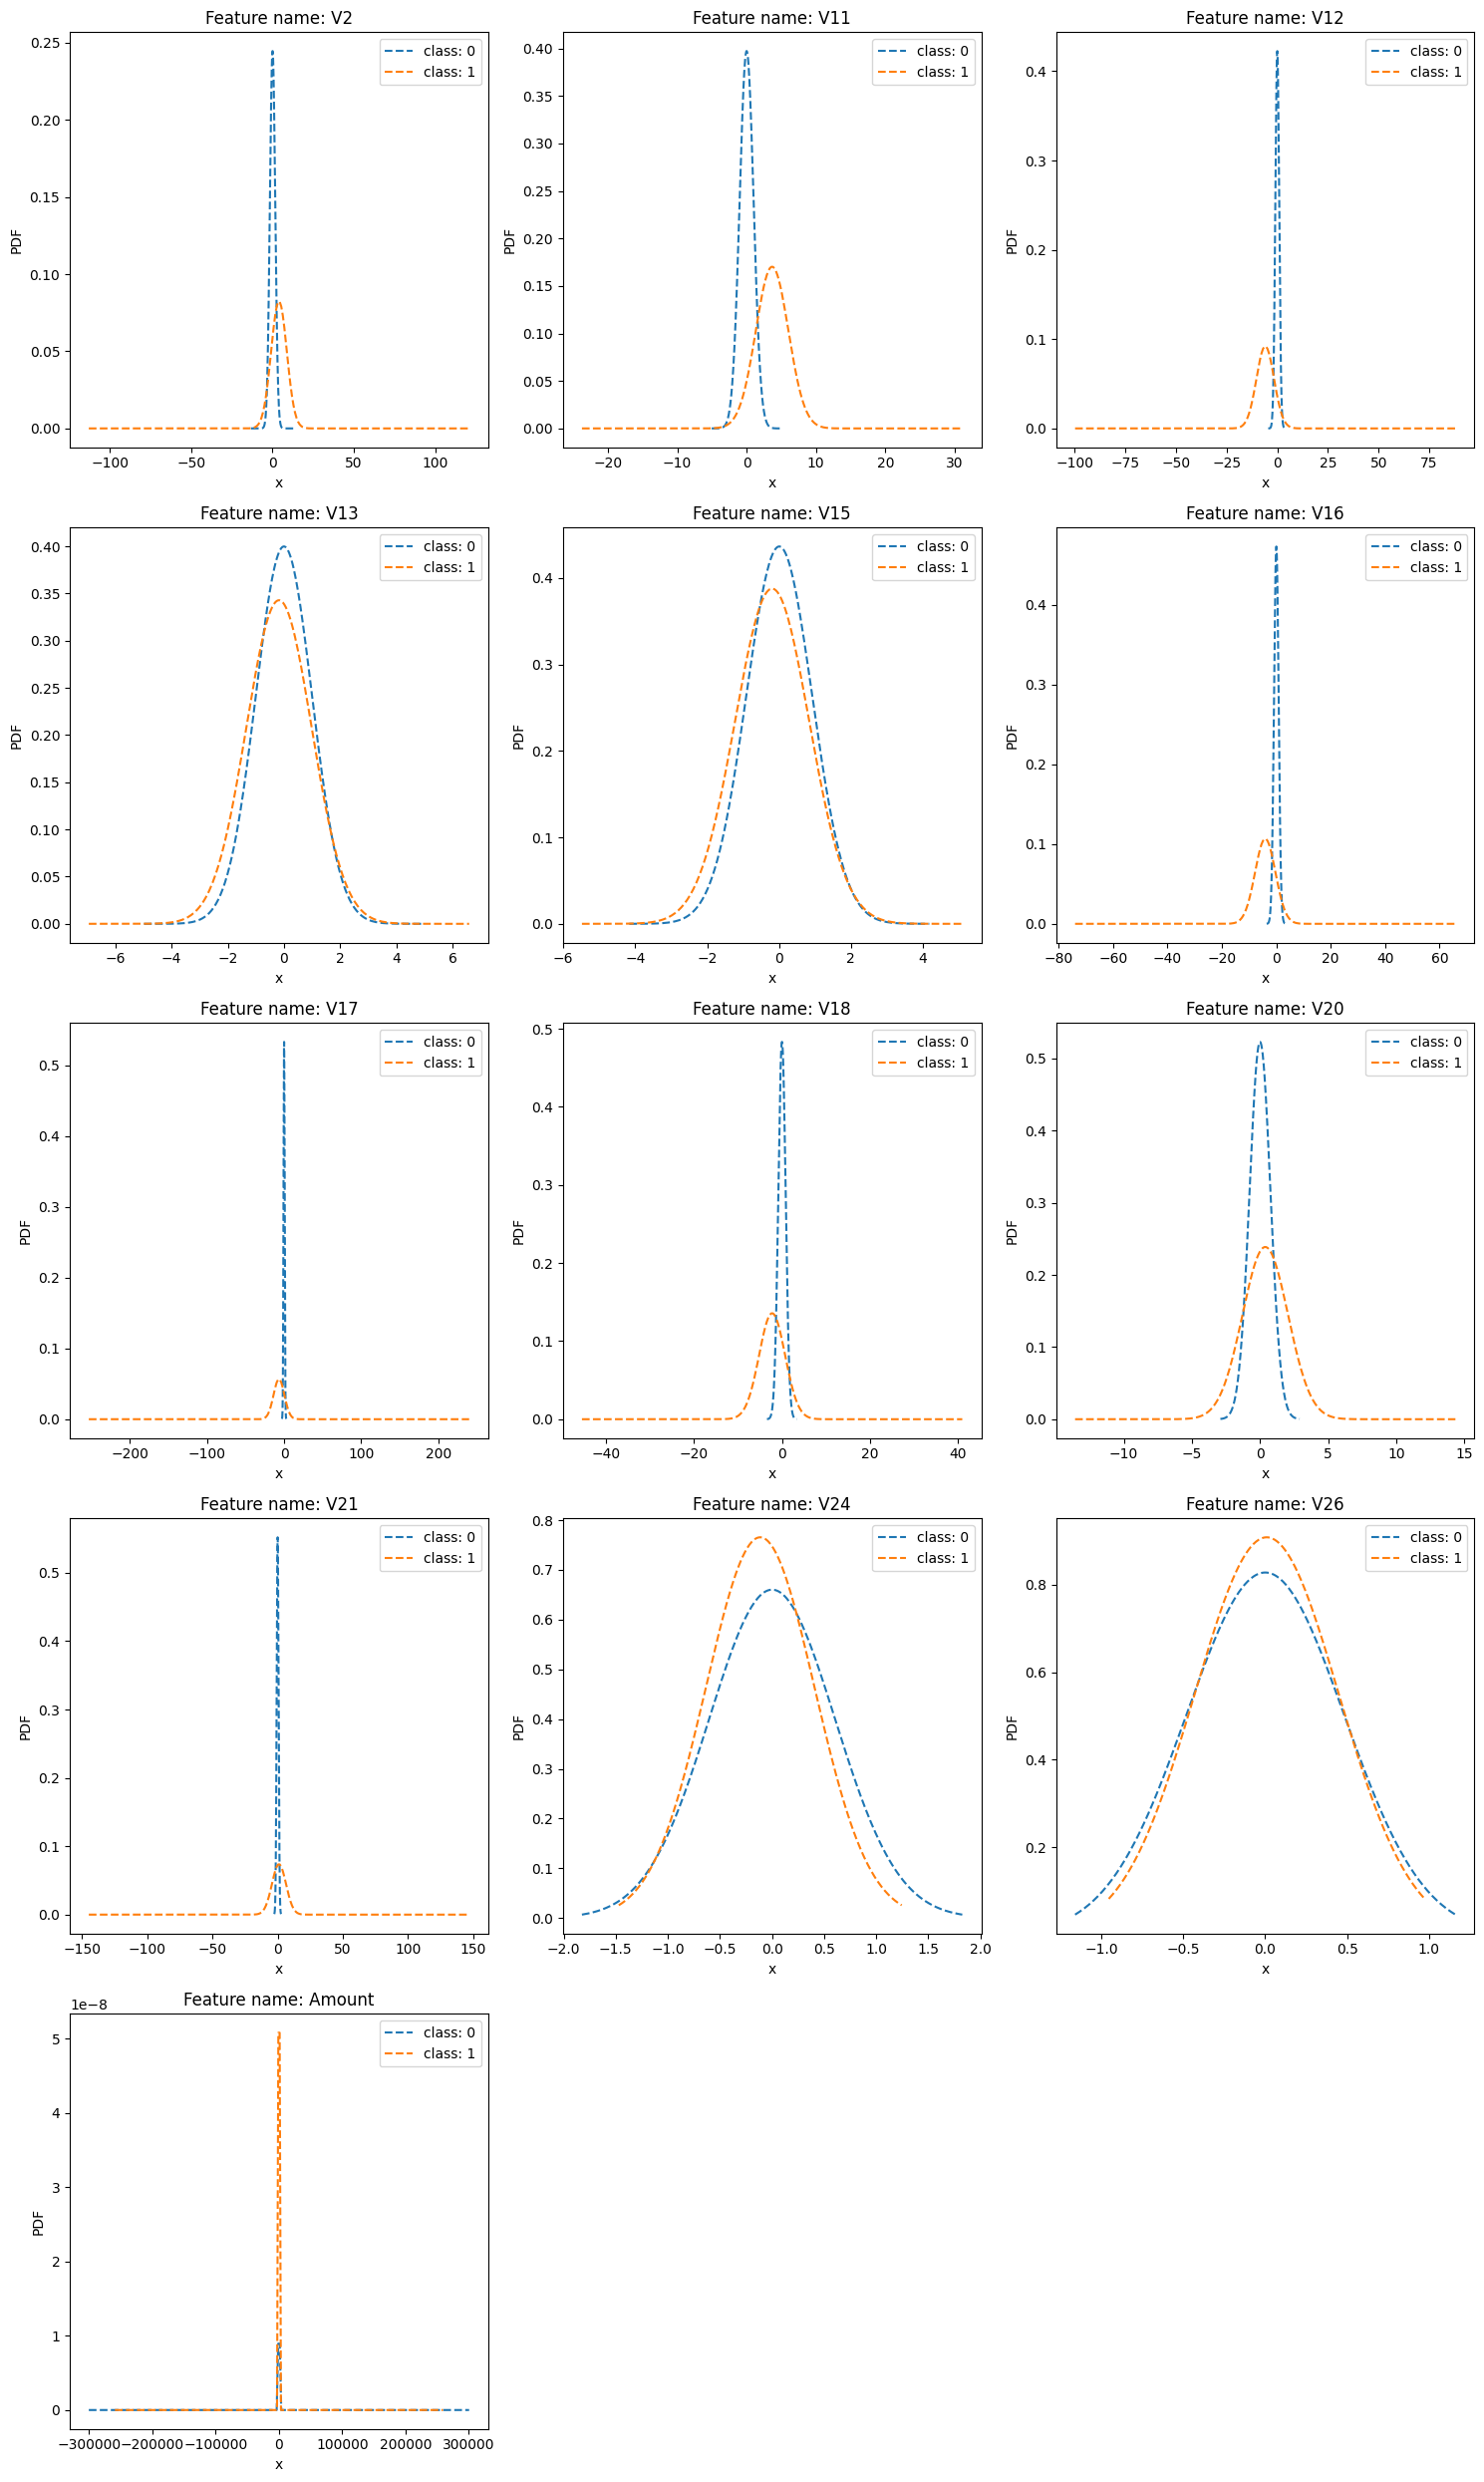

In [435]:
nb.plot_gaussian_pdfs(me.feature_vectors["v3"], n_cols = 3)